In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def objective_function(water_input, price):
    yield_term = 0.0038 * (10 + 0.1 * np.sqrt(water_input))**2 - 3.5542 * (10 + 0.1 * np.sqrt(water_input)) + 170.86
    cost_term = (5 + 0.005 * water_input) * water_input**1.1
    return price * yield_term - cost_term

def objective_gradient(water_input, price):
    epsilon = 1e-8  # Small constant to prevent division by zero
    sqrt_water_input = np.sqrt(water_input + epsilon)
    yield_gradient = price * (0.0076 * (10 + 0.1 * sqrt_water_input) * 0.1 / (2 * sqrt_water_input) - 3.5542 * 0.1 / (2 * sqrt_water_input))
    cost_gradient = (5 + 0.005 * water_input) * 1.1 * (water_input + epsilon)**0.1 + 0.005 * (water_input + epsilon)**1.1
    return yield_gradient - cost_gradient

def objective_hessian(water_input, price):
    epsilon = 1e-8  # Small constant to prevent division by zero
    sqrt_water_input = np.sqrt(water_input + epsilon)
    yield_hessian = price * (0.0076 * 0.1 / (4 * sqrt_water_input**3))
    cost_hessian = 1.1 * 0.1 * (water_input + epsilon)**0.1 + 0.005 * 1.1 * (water_input + epsilon)**0.1
    return yield_hessian - cost_hessian

# Define other necessary functions and variables as needed
# For example, the newton_optimizer function and its usage

def newton_optimizer(price, water_available, max_iterations, initial_water_input, initial_step_size, diminishing_rate):
    water_input = initial_water_input
    step_size = initial_step_size
    water_inputs = [water_input]
    objective_values = [objective_function(water_input, price)]
    
    for iteration in range(1, max_iterations):
        gradient = objective_gradient(water_input, price)
        hessian = objective_hessian(water_input, price)
        if hessian != 0:
            new_water_input = water_input - step_size * (gradient / hessian)
        else:
            new_water_input = water_input
        
        new_water_input = np.clip(new_water_input, 0, water_available)
        step_size = initial_step_size / (1 + diminishing_rate * iteration)
        water_inputs.append(new_water_input)
        objective_values.append(objective_function(new_water_input, price))
        water_input = new_water_input
    
    return water_input, water_inputs, objective_values

price = 420
water_available = 1000
max_iterations = 10
initial_water_input = 300
initial_step_size = 10
diminishing_rate = 0.01

optimal_water_input, water_inputs, objective_values = newton_optimizer(price, water_available, max_iterations, initial_water_input, initial_step_size, diminishing_rate)


print("Optimal Water Input:", optimal_water_input)
print("Optimal Objective Value:", objective_function(optimal_water_input, price))

Optimal Water Input: 8.475156127952098e-05
Optimal Objective Value: 56991.81497350518


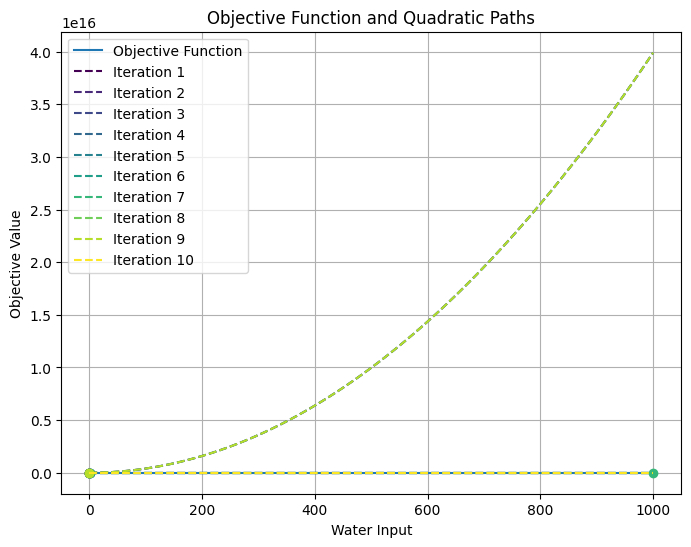

In [51]:

# Create a grid of water input values for plotting
water_input_grid = np.linspace(0, water_available, 100)

# Plot the objective function and the quadratic paths at each iteration
plt.figure(figsize=(8, 6))
plt.plot(water_input_grid, [objective_function(w, price) for w in water_input_grid], label='Objective Function')

colors = cm.viridis(np.linspace(0, 1, max_iterations))
for i in range(max_iterations):
    w = water_inputs[i]
    f = objective_values[i]
    gradient = objective_gradient(w, price)
    hessian = objective_hessian(w, price)
    quadratic_path = f + gradient * (water_input_grid - w) + 0.5 * hessian * (water_input_grid - w)**2
    plt.plot(water_input_grid, quadratic_path, color=colors[i], linestyle='--', label=f'Iteration {i+1}')
    
    if i < max_iterations - 1:
        next_w = water_inputs[i+1]
        next_f = objective_function(next_w, price)
        plt.plot(next_w, next_f, 'o', color=colors[i], markersize=6)

plt.xlabel('Water Input')
plt.ylabel('Objective Value')
plt.title('Objective Function and Quadratic Paths')
plt.legend()
plt.grid(True)
plt.show()

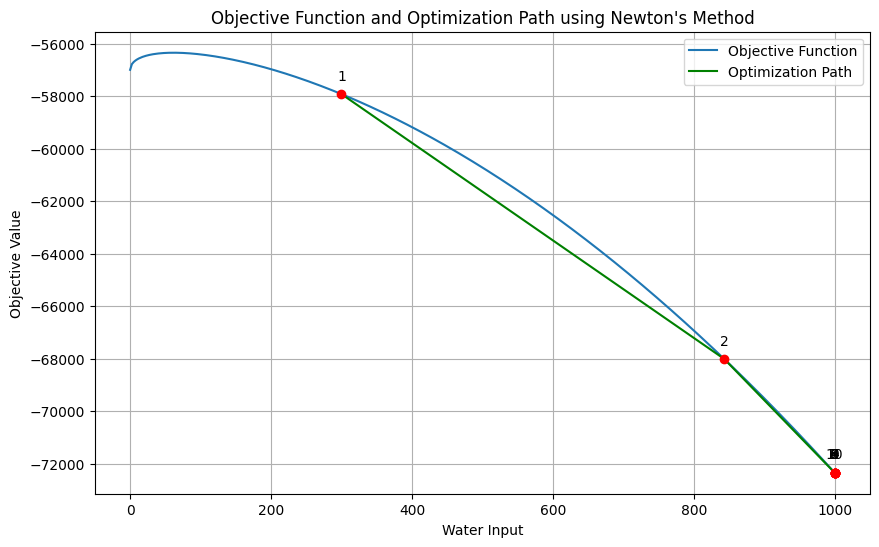

In [12]:
# Plotting
plt.figure(figsize=(10, 6))
water_range = np.linspace(0, water_available, 400)
plt.plot(water_range, [objective_function(w, price) for w in water_range], label='Objective Function')

# Plot the path
plt.scatter(water_inputs, objective_values, color='red', zorder=5)
plt.plot(water_inputs, objective_values, label='Optimization Path', color='green')

# Annotate the points
for i, (x, y) in enumerate(zip(water_inputs, objective_values), start=1):
    plt.annotate(f'{i}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Objective Function and Optimization Path using Newton\'s Method')
plt.xlabel('Water Input')
plt.ylabel('Objective Value')
plt.legend()
plt.grid(True)
plt.show()